In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#import and merge datasets
data1 = pd.read_csv(r"C:\Users\hk3to\OneDrive\Desktop\RAIN\Project\Zindidata files\testdemographics.csv")
data2 = pd.read_csv(r"C:\Users\hk3to\OneDrive\Desktop\RAIN\Project\Zindidata files\testperf.csv")
data3 = pd.read_csv(r"Zindidata files\testprevloans.csv")


In [4]:
data2.corr(numeric_only=True)

,systemloanid,loannumber,loanamount,totaldue,termdays
systemloanid,1.000000,-0.057385,-0.075021,-0.079412,-0.066358
loannumber,-0.057385,1.000000,0.831313,0.812922,0.381835
loanamount,-0.075021,0.831313,1.000000,0.994869,0.547527
totaldue,-0.079412,0.812922,0.994869,1.000000,0.613946
termdays,-0.066358,0.381835,0.547527,0.613946,1.000000


In [5]:
data3.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000


In [6]:
data1.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN


In [7]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907 entries, 0 to 5906
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       5907 non-null   object 
 1   systemloanid     5907 non-null   int64  
 2   loannumber       5907 non-null   int64  
 3   approveddate     5907 non-null   object 
 4   creationdate     5907 non-null   object 
 5   loanamount       5907 non-null   float64
 6   totaldue         5907 non-null   float64
 7   termdays         5907 non-null   int64  
 8   closeddate       5907 non-null   object 
 9   referredby       325 non-null    object 
 10  firstduedate     5907 non-null   object 
 11  firstrepaiddate  5907 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 553.9+ KB


In [8]:
# merging datasets on customerid
# columnsToMerge = [data1,data2,data3]
merged_data12 = pd.merge(data1,data2,on='customerid')
# loan_data = pd.merge(data3,merged_data12,on='customerid')
loan_data = pd.concat([data3,merged_data12],axis=0)
loan_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,8a858e675c3fe0a1015c44ba8a037fee,301987980,2,14:28.0,14:20.0,10000.0,11500.0,15,NaN,NaN,NaN,NaN,1994-04-26 00:00:00.000000,Savings,5.288827,7.604053,GT Bank,NaN,Permanent,NaN
381,8a858fda5c1bd1f7015c1be7f7450f37,301972650,3,28:11.0,28:03.0,10000.0,13000.0,30,NaN,NaN,NaN,NaN,1990-11-24 00:00:00.000000,Savings,5.313058,5.412953,Fidelity Bank,NaN,Permanent,NaN
382,8a858f0c5ca18b3d015ca194f4a60867,301960859,2,18:51.0,18:45.0,10000.0,13000.0,30,NaN,NaN,NaN,NaN,1988-04-01 00:00:00.000000,Savings,3.349666,6.600069,EcoBank,NaN,Permanent,NaN
383,8a858e675b00c831015b06776ce75e69,301996981,5,27:00.0,26:55.0,20000.0,24500.0,30,NaN,NaN,NaN,NaN,1975-04-07 00:00:00.000000,Savings,3.876507,7.367196,UBA,NaN,Permanent,NaN


In [9]:
loan_data.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
closeddate                     385
referredby                    5913
firstduedate                   385
firstrepaiddate                385
birthdate                     5907
bank_account_type             5907
longitude_gps                 5907
latitude_gps                  5907
bank_name_clients             5907
bank_branch_clients           6288
employment_status_clients     5960
level_of_education_clients    6245
dtype: int64

In [10]:
null_val_percent = round((loan_data.birthdate.isnull().sum() / len(loan_data)) * 100,2)
null_val_percent

93.88

In [11]:
#getting the percentage of missing values for all data
large_null_columns = []
for col,null_count in zip(loan_data.columns,loan_data.isnull().sum()):
    null_percent = round((null_count/len(loan_data)) * 100,2)
    if null_percent > 30:
        large_null_columns.append(col)
    # print(col,null_percent)
large_null_columns

['referredby',
 'birthdate',
 'bank_account_type',
 'longitude_gps',
 'latitude_gps',
 'bank_name_clients',
 'bank_branch_clients',
 'employment_status_clients',
 'level_of_education_clients']

In [12]:
#dropping null values
for null_cols in large_null_columns:
    loan_data.drop(columns=null_cols,inplace=True)
loan_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000
...,...,...,...,...,...,...,...,...,...,...,...
380,8a858e675c3fe0a1015c44ba8a037fee,301987980,2,14:28.0,14:20.0,10000.0,11500.0,15,NaN,NaN,NaN
381,8a858fda5c1bd1f7015c1be7f7450f37,301972650,3,28:11.0,28:03.0,10000.0,13000.0,30,NaN,NaN,NaN
382,8a858f0c5ca18b3d015ca194f4a60867,301960859,2,18:51.0,18:45.0,10000.0,13000.0,30,NaN,NaN,NaN
383,8a858e675b00c831015b06776ce75e69,301996981,5,27:00.0,26:55.0,20000.0,24500.0,30,NaN,NaN,NaN


In [13]:
#get the mode of the colmuns with null values
loan_data.isnull().sum()

customerid           0
systemloanid         0
loannumber           0
approveddate         0
creationdate         0
loanamount           0
totaldue             0
termdays             0
closeddate         385
firstduedate       385
firstrepaiddate    385
dtype: int64

In [14]:
loan_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000
...,...,...,...,...,...,...,...,...,...,...,...
380,8a858e675c3fe0a1015c44ba8a037fee,301987980,2,14:28.0,14:20.0,10000.0,11500.0,15,NaN,NaN,NaN
381,8a858fda5c1bd1f7015c1be7f7450f37,301972650,3,28:11.0,28:03.0,10000.0,13000.0,30,NaN,NaN,NaN
382,8a858f0c5ca18b3d015ca194f4a60867,301960859,2,18:51.0,18:45.0,10000.0,13000.0,30,NaN,NaN,NaN
383,8a858e675b00c831015b06776ce75e69,301996981,5,27:00.0,26:55.0,20000.0,24500.0,30,NaN,NaN,NaN


In [15]:
loan_data.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [16]:
loan_data.corr(numeric_only=True)

,systemloanid,loannumber,loanamount,totaldue,termdays
systemloanid,1.000000,0.167181,0.111517,0.110229,0.039598
loannumber,0.167181,1.000000,0.782081,0.765739,0.321837
loanamount,0.111517,0.782081,1.000000,0.995189,0.493092
totaldue,0.110229,0.765739,0.995189,1.000000,0.567468
termdays,0.039598,0.321837,0.493092,0.567468,1.000000


# Summary of remainder columns
- Customerid -> Unique identifier of customer row data
- Systemloanid -> The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out
- loannumber -> The number of the loans that you have to predict
- approveddate -> Date that loan was approved
- creationdate -> Date that loan application was created
- loanamount -> Loan value taken
- totaldue -> Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees
- termdays -> Term of loan
- closeddate -> Date that the loan was settled
- firstduedate -> Date of first payment due in cases where the term is longer than 30 days. So in the case where the term is 60+ days - then there are multiple monthly payments due - and this dates reflects the date of the first payment
- firstrepaiddate -> Actual date that he/she paid the first payment as defined above

In [17]:
loan_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000


array([[<Axes: title={'center': 'systemloanid'}>,
        <Axes: title={'center': 'loannumber'}>],
       [<Axes: title={'center': 'loanamount'}>,
        <Axes: title={'center': 'totaldue'}>],
       [<Axes: title={'center': 'termdays'}>, <Axes: >]], dtype=object)

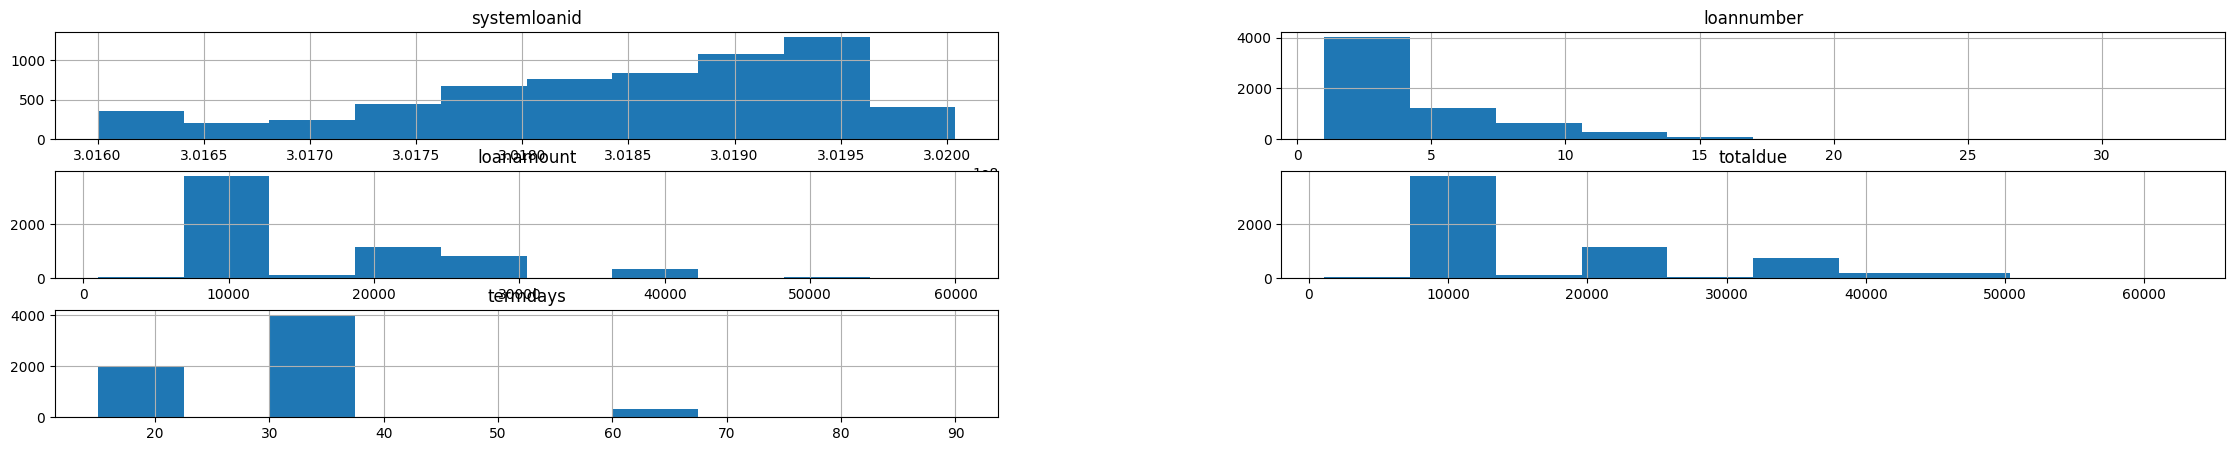

In [18]:
loan_data.hist(figsize=(28,5))

In [19]:
# Observed columns in wrond format
# 1. birthdate is supposed to be a datetime not object
loan_data

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000
...,...,...,...,...,...,...,...,...,...,...,...
380,8a858e675c3fe0a1015c44ba8a037fee,301987980,2,14:28.0,14:20.0,10000.0,11500.0,15,NaN,NaN,NaN
381,8a858fda5c1bd1f7015c1be7f7450f37,301972650,3,28:11.0,28:03.0,10000.0,13000.0,30,NaN,NaN,NaN
382,8a858f0c5ca18b3d015ca194f4a60867,301960859,2,18:51.0,18:45.0,10000.0,13000.0,30,NaN,NaN,NaN
383,8a858e675b00c831015b06776ce75e69,301996981,5,27:00.0,26:55.0,20000.0,24500.0,30,NaN,NaN,NaN


In [20]:
loan_data[['loannumber']]

,loannumber
0,3
1,5
2,6
3,3
4,2
...,...
380,2
381,3
382,2
383,5


In [21]:
#getting the overall number of null data in merged dataset

null_data = loan_data.isnull().sum()
null_data

customerid           0
systemloanid         0
loannumber           0
approveddate         0
creationdate         0
loanamount           0
totaldue             0
termdays             0
closeddate         385
firstduedate       385
firstrepaiddate    385
dtype: int64

In [22]:
loan_data.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [23]:
#inputs:
# custid
# systemloanid
#loannumber
#creationdate
# loanamount
# totaldue
# termdays


In [24]:
loan_data.sample()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
4316,8a858e10570f2d6501571f38cbfc725c,301836000,11,2017-03-11 12:38:07.000000,2017-03-11 11:38:00.000000,40000.0,44800.0,30,2017-04-07 15:02:26.000000,2017-04-10 00:00:00.000000,2017-04-07 14:47:17.000000


# Current Tasks
- Removeid columns
- Split date columns into dd-mm-yy-hh columns


In [25]:
loan_data.drop(["customerid","systemloanid"],axis = 1,inplace=True)

In [26]:
loan_data

,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000
...,...,...,...,...,...,...,...,...,...
380,2,14:28.0,14:20.0,10000.0,11500.0,15,NaN,NaN,NaN
381,3,28:11.0,28:03.0,10000.0,13000.0,30,NaN,NaN,NaN
382,2,18:51.0,18:45.0,10000.0,13000.0,30,NaN,NaN,NaN
383,5,27:00.0,26:55.0,20000.0,24500.0,30,NaN,NaN,NaN


In [27]:
hour_values = []
day_values = []
month_values = list()
year_values = list()

def dateSplit(date):

    loan_data[date] = pd.to_datetime(loan_data[date], errors = 'coerce')#%m/%d/%y %H:%M
    
    #Creating new columns derived from 
    loan_data[str(date) + 'Hour'] = loan_data[date].dt.hour
    hour_values.append(str(date) + 'Hour')
    loan_data[str(date) + 'Day'] = loan_data[date].dt.day
    day_values.append(str(date) + 'Day')
    loan_data[str(date) + 'Month'] = loan_data[date].dt.month
    month_values.append(str(date) + 'Month')
    loan_data[str(date) + 'Year'] = loan_data[date].dt.year
    year_values.append(str(date) + 'Year')
    return loan_data[date]


In [28]:
#looping over date columns to pass the to the datesplit function
date_columns = []
for date in loan_data.columns:
    if date[-4:] == 'date':
        date_columns.append(date)
        dateSplit(date)

In [29]:
#dropping original date tables

for column in date_columns:
    loan_data.drop(column, axis=1,inplace=True)
    

In [30]:
loan_data.isnull().sum()

loannumber                0
loanamount                0
totaldue                  0
termdays                  0
approveddateHour        385
approveddateDay         385
approveddateMonth       385
approveddateYear        385
creationdateHour        385
creationdateDay         385
creationdateMonth       385
creationdateYear        385
closeddateHour          385
closeddateDay           385
closeddateMonth         385
closeddateYear          385
firstduedateHour        385
firstduedateDay         385
firstduedateMonth       385
firstduedateYear        385
firstrepaiddateHour     385
firstrepaiddateDay      385
firstrepaiddateMonth    385
firstrepaiddateYear     385
dtype: int64

In [31]:
for missing_value in loan_data:
    if loan_data[missing_value].isnull().sum() > 0:
        loan_data[missing_value].fillna(loan_data[missing_value].median(), inplace=True)

C:\Users\hk3to\AppData\Local\Temp\ipykernel_30976\1277273658.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[missing_value].fillna(loan_data[missing_value].median(), inplace=True)
C:\Users\hk3to\AppData\Local\Temp\ipykernel_30976\1277273658.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [32]:
loan_data.isnull().sum()

loannumber              0
loanamount              0
totaldue                0
termdays                0
approveddateHour        0
approveddateDay         0
approveddateMonth       0
approveddateYear        0
creationdateHour        0
creationdateDay         0
creationdateMonth       0
creationdateYear        0
closeddateHour          0
closeddateDay           0
closeddateMonth         0
closeddateYear          0
firstduedateHour        0
firstduedateDay         0
firstduedateMonth       0
firstduedateYear        0
firstrepaiddateHour     0
firstrepaiddateDay      0
firstrepaiddateMonth    0
firstrepaiddateYear     0
dtype: int64

In [33]:
loan_data

,loannumber,loanamount,totaldue,termdays,approveddateHour,approveddateDay,approveddateMonth,approveddateYear,creationdateHour,creationdateDay,...,closeddateMonth,closeddateYear,firstduedateHour,firstduedateDay,firstduedateMonth,firstduedateYear,firstrepaiddateHour,firstrepaiddateDay,firstrepaiddateMonth,firstrepaiddateYear
0,3,10000.0,13000.0,30,10.0,17.0,5.0,2016.0,9.0,17.0,...,6.0,2016.0,0.0,16.0,6.0,2016.0,15.0,16.0,6.0,2016.0
1,5,30000.0,36800.0,60,21.0,4.0,2.0,2017.0,20.0,4.0,...,3.0,2017.0,0.0,6.0,3.0,2017.0,16.0,2.0,3.0,2017.0
2,6,30000.0,34400.0,30,10.0,4.0,3.0,2017.0,9.0,4.0,...,4.0,2017.0,0.0,3.0,4.0,2017.0,21.0,1.0,4.0,2017.0
3,3,10000.0,13000.0,30,14.0,2.0,6.0,2016.0,13.0,2.0,...,7.0,2016.0,0.0,4.0,7.0,2016.0,11.0,4.0,7.0,2016.0
4,2,10000.0,11500.0,15,9.0,16.0,5.0,2016.0,8.0,16.0,...,6.0,2016.0,0.0,31.0,5.0,2016.0,15.0,1.0,6.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2,10000.0,11500.0,15,13.0,16.0,5.0,2017.0,12.0,16.0,...,6.0,2017.0,0.0,16.0,6.0,2017.0,13.0,16.0,6.0,2017.0
381,3,10000.0,13000.0,30,13.0,16.0,5.0,2017.0,12.0,16.0,...,6.0,2017.0,0.0,16.0,6.0,2017.0,13.0,16.0,6.0,2017.0
382,2,10000.0,13000.0,30,13.0,16.0,5.0,2017.0,12.0,16.0,...,6.0,2017.0,0.0,16.0,6.0,2017.0,13.0,16.0,6.0,2017.0
383,5,20000.0,24500.0,30,13.0,16.0,5.0,2017.0,12.0,16.0,...,6.0,2017.0,0.0,16.0,6.0,2017.0,13.0,16.0,6.0,2017.0


# ML Process
- Supervised learning
- One hot encoding
- Binary classification -> Loan is either approved or denied


In [34]:
loan_data.describe()

,loannumber,loanamount,totaldue,termdays,approveddateHour,approveddateDay,approveddateMonth,approveddateYear,creationdateHour,creationdateDay,...,closeddateMonth,closeddateYear,firstduedateHour,firstduedateDay,firstduedateMonth,firstduedateYear,firstrepaiddateHour,firstrepaiddateDay,firstrepaiddateMonth,firstrepaiddateYear
count,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,...,6292.000000,6292.000000,6292.0,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000
mean,4.254291,16348.061030,19432.169803,26.884139,13.220280,15.745391,5.592498,2016.736332,12.487762,15.740782,...,5.935950,2016.775111,0.0,15.758423,5.938175,2016.779085,12.818341,15.893675,5.924984,2016.774158
std,3.428056,9347.235256,10436.987009,10.555908,4.999804,8.526098,2.744141,0.440656,4.914821,8.525353,...,2.595044,0.417542,0.0,8.771556,2.593137,0.414897,5.591131,9.014179,2.610721,0.418169
min,1.000000,1000.000000,1112.500000,15.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,1.000000,...,1.000000,2016.000000,0.0,1.000000,1.000000,2016.000000,0.000000,1.000000,1.000000,2016.000000
25%,2.000000,10000.000000,11500.000000,15.000000,10.000000,9.000000,4.000000,2016.000000,9.000000,9.000000,...,4.000000,2017.000000,0.0,8.000000,4.000000,2017.000000,9.000000,8.000000,4.000000,2017.000000
50%,3.000000,10000.000000,13000.000000,30.000000,13.000000,16.000000,5.000000,2017.000000,12.000000,16.000000,...,6.000000,2017.000000,0.0,16.000000,6.000000,2017.000000,13.000000,16.000000,6.000000,2017.000000
75%,6.000000,20000.000000,24500.000000,30.000000,17.000000,23.000000,6.000000,2017.000000,16.000000,23.000000,...,7.000000,2017.000000,0.0,23.000000,7.000000,2017.000000,17.000000,24.000000,7.000000,2017.000000
max,33.000000,60000.000000,62700.000000,90.000000,23.000000,31.000000,12.000000,2017.000000,23.000000,31.000000,...,12.000000,2017.000000,0.0,31.000000,12.000000,2017.000000,23.000000,31.000000,12.000000,2017.000000


<Axes: >

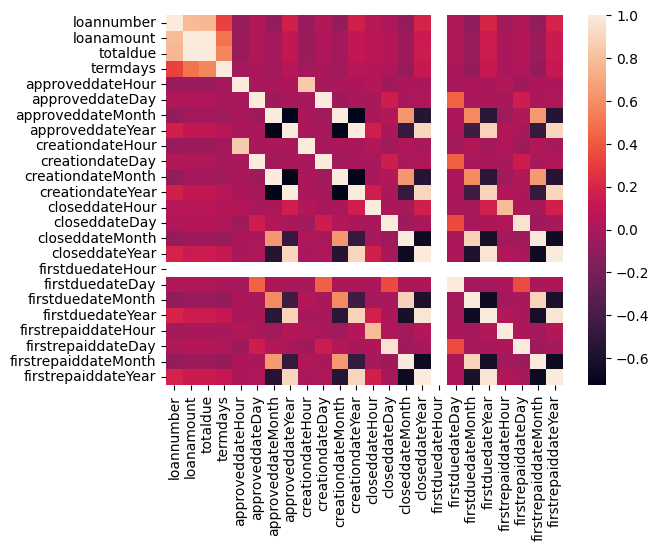

In [35]:
import seaborn as sns

sns.heatmap(loan_data.corr(numeric_only=True))

In [36]:
loan_data.nunique()

loannumber              33
loanamount              17
totaldue                87
termdays                 4
approveddateHour        24
approveddateDay         31
approveddateMonth       12
approveddateYear         2
creationdateHour        24
creationdateDay         31
creationdateMonth       12
creationdateYear         2
closeddateHour          24
closeddateDay           31
closeddateMonth         12
closeddateYear           2
firstduedateHour         1
firstduedateDay         31
firstduedateMonth       12
firstduedateYear         2
firstrepaiddateHour     24
firstrepaiddateDay      31
firstrepaiddateMonth    12
firstrepaiddateYear      2
dtype: int64

In [37]:
loan_data.dtypes

loannumber                int64
loanamount              float64
totaldue                float64
termdays                  int64
approveddateHour        float64
approveddateDay         float64
approveddateMonth       float64
approveddateYear        float64
creationdateHour        float64
creationdateDay         float64
creationdateMonth       float64
creationdateYear        float64
closeddateHour          float64
closeddateDay           float64
closeddateMonth         float64
closeddateYear          float64
firstduedateHour        float64
firstduedateDay         float64
firstduedateMonth       float64
firstduedateYear        float64
firstrepaiddateHour     float64
firstrepaiddateDay      float64
firstrepaiddateMonth    float64
firstrepaiddateYear     float64
dtype: object

In [38]:
obj = (loan_data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [39]:
model_dataset = loan_data[['loannumber','loanamount','totaldue','termdays']]

In [40]:
model_dataset

,loannumber,loanamount,totaldue,termdays
0,3,10000.0,13000.0,30
1,5,30000.0,36800.0,60
2,6,30000.0,34400.0,30
3,3,10000.0,13000.0,30
4,2,10000.0,11500.0,15
...,...,...,...,...
380,2,10000.0,11500.0,15
381,3,10000.0,13000.0,30
382,2,10000.0,13000.0,30
383,5,20000.0,24500.0,30


<Axes: >

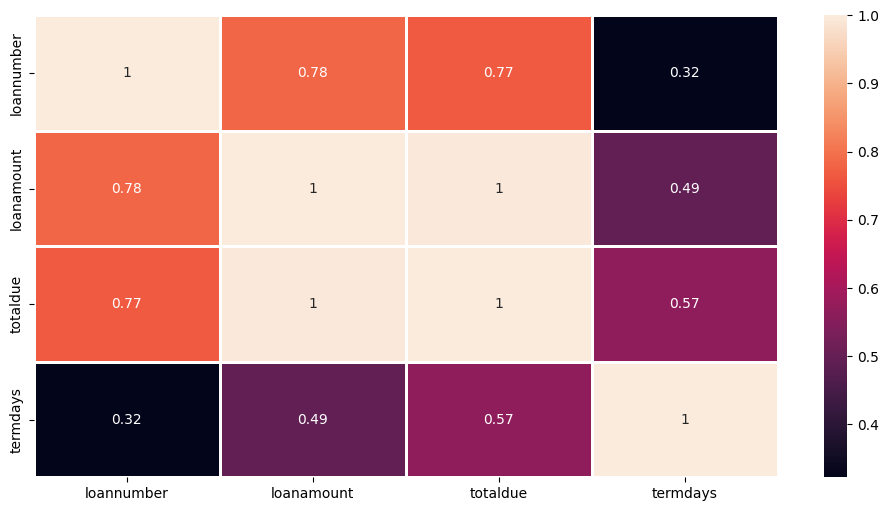

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(model_dataset.corr(),linewidths=2,annot=True)


In [42]:
# import sklearn
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression

# from sklearn import metrics

# knn = KNeighborsClassifier(n_neighbors=3)
# rfc = RandomForestClassifier(n_estimators=7,criterion = 'entropy',random_state=7)

# svc = SVC()
# lc = LogisticRegression()

# for clf in (rfc,knn,svc,lc):
#     clf.fit(X_train, Y_train)
#     Y_pred = clf.predict(X_train)
#     print("Accuracy score of ", clf.__class__.__name__,
#           "=",100*metrics.accuracy_score(Y_train,Y_pred))



In [43]:
#random forest
#logistic regression

# lightgbm
# xgboost
# catboost



# random forest

- Applications
    - Finance
    - Health Care
    - Enivornmental Analysis
    - Cyber info Analysis

> - Preparing Data for R.F Modelling 
>>    - Handling Missing values -> Imputing missing values or dropping of instances with missing values
>>    - Encoding Categorical Variables -> requires numerical inputs, so categorical variables need to be encoded. Techniques like one-hot encoding or label encoding transform categorical features into a format suitable for the algorithm.
>>    - Scaling and Normalization ->  is not sensitive to feature scaling, normalizing numerical features can still contribute to a more efficient training process and improved convergence
>>    - Feature Selection -> Assessing the importance of features within the dataset. R.f inhrently provides a feature importance score, aiding in the selection of relevant features for model training.
>>    - Addressing Imbalanced Data -> If dealing with imbalanced classes, implement techniques like adjusting class weights or employing resampling methods to ensure a balanced representation during training.

In [44]:
#implementation

from logging import warning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)
 



In [45]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
titanic_data = titanic_data.dropna(subset=['Survived'])

In [48]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
X = titanic_data[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y = titanic_data['Survived']

In [51]:
X.loc[:,'Sex'] = X['Sex'].map({'female':0, 'male':1})

In [52]:
X['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: object

In [53]:
val = ['age_range', 'income_amount','loan_amount','repayment_period','occupation','email']

In [54]:
import loan_ml_model
from sklearn.preprocessing import StandardScaler

In [55]:
val2 = {'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '0',
  'Education': 'Graduate',
  'Self_Employed': 'No',
  'ApplicantIncome': 5116,
  'CoapplicantIncome': 1451.0,
  'LoanAmount': 165.0,
  'Loan_Amount_Term': 360.0,
  'Credit_History': 0.0,
  'Property_Area': 'Urban'}

In [56]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [57]:
profile_df = pd.DataFrame(val2,index=[0])
profile_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban


In [58]:
profile = pd.get_dummies(profile_df,columns=profile_df.columns,dtype=int,drop_first=True)
# profile_df

In [59]:
new_profile = {  "ApplicantIncome": 30000,
  "CoapplicantIncome": 17051,
  "Credit_History": 0,
  "Dependents_1": 0,
  "Dependents_2": 1,
  "Dependents_3+": 0,
  "Education_Not Graduate": 1,
  "Gender_Male": 0,
  "LoanAmount": 300000,
  "Loan_Amount_Term": 500,
  "Married_Yes": 0,
  "Property_Area_Semiurban": 0,
  "Property_Area_Urban": 0,
  "Self_Employed_Yes": 1}

new_profile = pd.DataFrame(new_profile)

ValueError: If using all scalar values, you must pass an index

In [ ]:
profile_scalar = StandardScaler()
profile_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
test = [lambda x: x for x in profile_df.columns if profile_df[x].dtype == 'O']
test

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [ ]:

prof_norm = profile_scalar.fit_transform(prof_df)
prof_norm

NameError: name 'prof_df' is not defined

In [ ]:
profile_df
# prediction = loan_ml_model.prediction(profile_df)
# prediction

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban


In [ ]:
user_profile = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
profile_dict = {}
# if request.method == "POST":
for feature in user_profile:
            profile_dict[feature] = 
            # age_range = request.form.get("age_range")
            # income_amount = request.form.get("Income")
            # loan_amount = request.form.get("requested_loan")
            # repayment_period = request.form.get("repayment_period")
            # occupation = request.form.get("work")
            # email = request.form.get("mail")
            profile_df = pd.DataFrame(profile_dict,columns = user_profile,index=[0])
prediction = loan_ml_model.prediction(profile_df)

SyntaxError: invalid syntax (3962414721.py, line 7)